# Práctica 5. Operaciones con máscaras binarias

<div class="alert alert-block alert-success">
<b>Resumen:</b> Este notebook explora técnicas básicas de manipulación y procesamiento de imágenes utilizando Python y OpenCV. Inicia con la lectura de una imagen en escala de grises y procede a realizar una segmentación mediante umbrales, generando una máscara binaria. A través de esta máscara, se aplican operaciones como enmascaramiento lógico y aritmético, lo que permite modificar selectivamente la imagen en función de regiones específicas. Estas operaciones son fundamentales en el campo de la visión por computadora, donde la capacidad de aislar y destacar elementos de una imagen tiene aplicaciones críticas en reconocimiento de patrones, análisis de objetos y procesamiento automatizado de imágenes. El enfoque en la manipulación mediante máscaras resalta la importancia de las técnicas de segmentación en tareas como la detección de bordes, la identificación de objetos y el preprocesamiento para algoritmos de aprendizaje automático.
</div>

***
Instrucciones utilizadas:

- `cv2.imread()`: Lectura de imágenes en diferentes formatos.
- `plt.imshow()`: Visualización de datos de imagen en una representación gráfica.
- `plt.figure()`: Configuración avanzada de gráficos, permitiendo el control de la disposición visual.
- `plt.subplot()`: Creación de diseños de gráficos múltiples, facilitando comparaciones visuales.
- `np.uint8()`: Conversión de tipos de datos, esencial para operaciones eficientes en imágenes.
- `im_gray.copy()`: Clonación de datos de imagen para preservación y manipulación simultánea.
- `* (multiplicación)`: Operación fundamental en el ajuste de imágenes, utilizada aquí para aplicar máscaras.
- `im_bw.astype()`: Conversión de booleanos a enteros para operaciones de enmascaramiento.

Temas relacionados:

- <b>Procesamiento de imágenes en OpenCV:</b> Técnicas clave para la manipulación de imágenes en entornos de producción.
- <b>Máscaras binarias:</b> Herramienta esencial en la segmentación y en la preparación de imágenes para análisis más profundos.
- <b>Visualización de imágenes en Matplotlib:</b> Métodos para la presentación efectiva de datos visuales.
- <b>Operaciones aritméticas en imágenes:</b> Fundamentos de la manipulación directa de datos visuales.
- <b>Tipos de datos en imágenes:</b> Comprensión de las representaciones de datos y su impacto en el procesamiento y la eficiencia.
***

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1. Lectura de la imagen

Lectura y visualización de la imagen de prueba

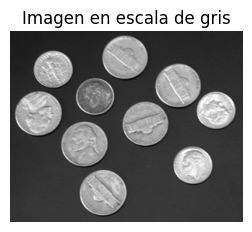

In [4]:
im_gray = cv2.imread('./images/coins.png', cv2.IMREAD_GRAYSCALE)

# Mostrar imagen
plt.figure(figsize=(3,3))
plt.imshow(im_gray, cmap='gray')
plt.title('Imagen en escala de gris')
plt.axis('off')
plt.show()

## 2. Segmentación por umbral

<b>Actividad:</b> identifique los mejores valores que segmentan las monedas.


Atributos de la máscara (im_bw):  (246, 300) bool 



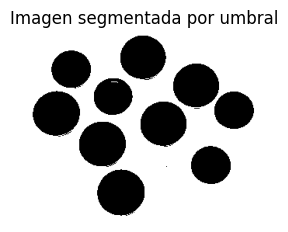

In [5]:
umbral_sup = 90
umbral_inf = 30
im_bw = (umbral_inf < im_gray) & (im_gray < umbral_sup)

# máscara
print("\nAtributos de la máscara (im_bw): ", im_bw.shape, im_bw.dtype, "\n")

# Mostrar imagen
plt.figure(figsize=(3,3))
plt.imshow(im_bw, cmap='gray')
plt.title('Imagen segmentada por umbral')
plt.axis('off')
plt.show()

### 2.1 Visualización de las imágenes

Visualización de las imágenes con un subplot

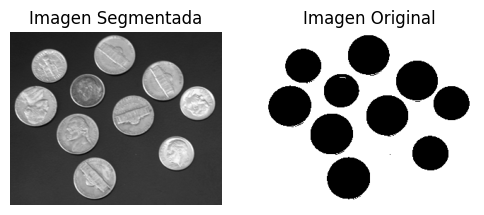

In [6]:
# plot 1
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.imshow(im_gray, cmap='gray')
plt.title('Imagen Segmentada')
plt.axis('off')

# plot 2
plt.subplot(1,2,2)
plt.imshow(im_bw, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# muestra las dos imágenes
plt.show()

## 3. Operación de masking (máscaras binarias)
### 3.1 Operaciones lógicas

Operaciones lógicas sobre la máscara

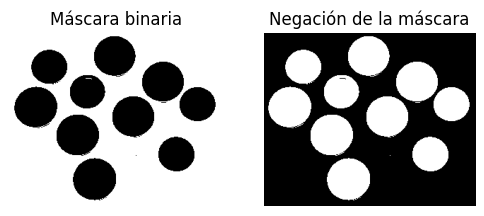

In [7]:
# máscara inicial
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.imshow(im_bw, cmap='gray')
plt.title('Máscara binaria')
plt.axis('off')

# máscara inicial negada
plt.subplot(1,2,2)
plt.imshow(~im_bw, cmap='gray')
plt.title('Negación de la máscara')
plt.axis('off')
plt.show()

### 3.2 Indexado mediante máscaras binarias

Indexado mediante máscaras binarias

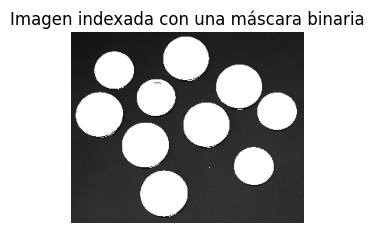

In [8]:
im_gray_mask_1 = im_gray.copy() # copia de la imagen original
im_gray_mask_1[im_bw == 0] = 255

# mostrar imagen
plt.figure(figsize=(3,3))
plt.imshow(im_gray_mask_1, cmap='gray')
plt.title('Imagen indexada con una máscara binaria')
plt.axis('off')
plt.show()

### 3.3 Operaciones aritméticas con máscaras

El comando `im_gray_mask_2 = im_gray * im_bw.astype(np.uint8)` realiza una operación de enmascaramiento en la que se multiplica cada píxel de la imagen original en escala de grises (im_gray) por una máscara binaria (im_bw). La máscara se convierte de booleano a enteros (uint8), donde True es 1 y False es 0. Como resultado, los píxeles correspondientes a 1 en la máscara conservan su valor original, mientras que los píxeles donde la máscara es 0 se establecen a 0, creando así una imagen donde solo se muestran las regiones deseadas.

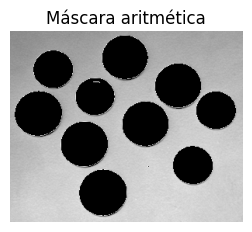

In [9]:
# Operaciones aritméticas con máscaras
im_gray_mask_2 = im_gray * im_bw.astype(np.uint8)

plt.figure(figsize=(3,3))
plt.imshow(im_gray_mask_2, cmap='gray')
plt.title('Máscara aritmética')
plt.axis('off')
plt.show()

### 3.4 Actividad

Invierta las intensidades de la anterior imagen.

In [10]:
# escriba aquí su código

### 3.5 Indexado mediante máscara binaria

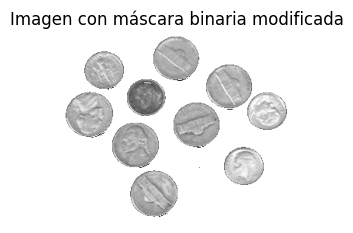

In [11]:
im_gray_mask_3 = im_gray.copy() # copiamos la imagen original
im_gray_mask_3[im_bw] = 255

plt.figure(figsize=(3,3))
plt.imshow(im_gray_mask_3, cmap='gray')
plt.title('Imagen con máscara binaria modificada')
plt.axis('off')
plt.show()

<div style="text-align: center; margin: 20px 0;">
  <hr style="border: none; height: 2px; background: linear-gradient(to right, #bbb, #333, #bbb); width: 50%; margin: 0 auto;" />
</div>